# The Data #

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import usefull_methods as um
import do_actions as do

%matplotlib inline

from stopwatch import Stopwatch
stopwatch = Stopwatch()

# Pretty display for notebooks
%matplotlib inline

data_train = pd.DataFrame()
data_test = pd.DataFrame()

data_train, data_test = um.load_data()
    
# Success
print "Kaggle 'House prices'  TRAIN dataset has {} data points with {} variables each.".format(*data_train.shape)
print "Kaggle 'House prices'  TEST dataset has {} data points with {} variables each.".format(*data_test.shape)

Kaggle 'House prices'  TRAIN dataset has 1460 data points with 81 variables each.
Kaggle 'House prices'  TEST dataset has 1459 data points with 80 variables each.


# Metrics #

In [2]:
import sklearn
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def RMSE(y, y_pred):
    return np.sqrt(np.sum(np.square(y_pred-y))/len(y))

def RMSElog(y, y_pred):
    y = np.log(y)
    y_pred = np.log(y_pred)
    return np.sqrt(np.sum(np.square(y_pred-y))/len(y))

def calc_metrics(y, y_pred):
    r2score = r2_score(y, y_pred)
    rmse_log = RMSElog(y, y_pred)
    rmse = RMSE(y, y_pred)
    return rmse, rmse_log,  r2score

def print_metrics (rmse, rmse_log,r2score):
    print('RMSE               : {:.4f}'.format(rmse, prec=5))
    print('RMSE of logarithms : {:.4f}'.format(rmse_log, prec=5))
    print('R2 score           : {:.6f}'.format(r2score, prec = 5))
    
def show_metrics(y, y_pred):
    rmse, rmse_log, r2score = calc_metrics(y, y_pred)
    print_metrics(rmse, rmse_log, r2score )
       

## First prediction - Linear Regression: 'SalePrice' vs. 'GrLivArea' ##

In [3]:
from sklearn.linear_model import LinearRegression

def do_LinearRegression(first_col, second_col):
    prices = data_train[first_col]
    features = data_train[second_col].values.reshape(-1,1)
    model = LinearRegression()
    model.fit(features, prices)
    predicted = model.predict(features)
    return prices, predicted



In [4]:
data_train, data_test = um.load_data() 

y, y_pred = do_LinearRegression('SalePrice', 'GrLivArea')
show_metrics( y, y_pred )

RMSE               : 56034.3039
RMSE of logarithms : 0.2756
R2 score           : 0.502149


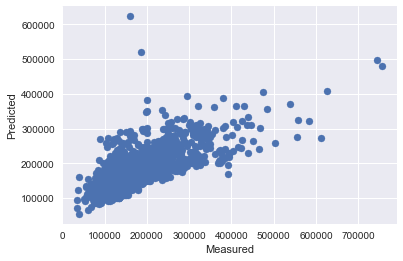

In [5]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Missing Data #

In [6]:
def show_missing(data):
    # df.isnull() Return a boolean same-sized object indicating if the values are null.
    # df.any() Return whether any element is True over requested axis
    #
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Looking at categorical values
def cat_exploration(data, column):
    return data[column].value_counts()

# deleting missing data
def handle_missing(data, column, value):
    data.loc[data[column].isnull(),column] = value
    return data

def count_missing(data):
    data[show_missing(data)].isnull().sum()

In [7]:
data_train, data_test = um.load_data()
all_data = pd.concat((data_train, data_test))

#all_data.columns[all_data.isnull().any(axis=0)]

show_missing(all_data)

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SalePrice',
 'SaleType',
 'TotalBsmtSF',
 'Utilities']

In [8]:
def do_handle_missing_data(data):
    data = handle_missing(data, 'PoolQC', 'None')
    data = handle_missing(data, 'MiscFeature', 'None' )
    data = handle_missing(data, 'Alley', 'None' )
    data = handle_missing(data, 'Fence', 'None' )
    data = handle_missing(data, 'FireplaceQu', 'None' )
    data = handle_missing(data, 'LotFrontage', 0.0 )
    
    data = handle_missing(data, 'GarageType', 'None' )
    data = handle_missing(data, 'GarageYrBlt', 0.0 )
    data = handle_missing(data, 'GarageFinish', 'None' )
    data = handle_missing(data, 'GarageQual', 'None' )
    data = handle_missing(data, 'GarageCond', 'None' )
    data = handle_missing(data, 'GarageArea', 0.0 )
    data = handle_missing(data, 'GarageCars', 'None' )
 
    data = handle_missing(data, 'BsmtQual', 'None' )
    data = handle_missing(data, 'BsmtCond', 'None' )
    data = handle_missing(data, 'BsmtExposure', 'None' )
    data = handle_missing(data, 'BsmtFinType1', 'None' )
    data = handle_missing(data, 'BsmtFinType2', 'None' )
    
    data = handle_missing(data, 'BsmtFinSF1', 0.0)
    data = handle_missing(data, 'BsmtFinSF2', 0.0 )
    data = handle_missing(data, 'BsmtFullBath', 'None' )
    data = handle_missing(data, 'BsmtHalfBath', 'None' )
    data = handle_missing(data, 'BsmtUnfSF', 0.0 )
    
    data = handle_missing(data, 'TotalBsmtSF', 0.0 )
    
    data = handle_missing(data, 'MasVnrType', 'None' )
    data = handle_missing(data, 'MasVnrArea', 0.0 )
    data = handle_missing(data, 'Electrical','SBrkr' )
    
    data = handle_missing(data, 'Functional','Typ' )
    
    data = handle_missing(data, 'KitchenQual','TA' )
    data = handle_missing(data, 'MSZoning','RL' )
    data = handle_missing(data, 'Exterior1st','VinylSd' )
    data = handle_missing(data, 'Exterior2nd','VinylSd' )
    
    data = handle_missing(data, 'SaleType','WD' )
    
    # not in training set
    data = data.drop(['Utilities'], axis=1)
    
    return data

In [9]:
data_train, data_test = um.load_data()
all_data = pd.concat((data_train, data_test))

all_data = do_handle_missing_data(all_data)
show_missing(all_data)

['SalePrice']

# Handle Categorical  Data #

In [50]:
categoricaldata = ('MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'PoolQC',
                       'Street', 'BsmtCond', 'GarageCond', 'GarageQual',
                      'BsmtQual', 'CentralAir', 'ExterQual', 'ExterCond', 'HeatingQC',
                      'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional',
                      'BsmtExposure', 'GarageFinish','LandSlope', 'LotShape', 'MSZoning',
                      'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
                      'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
                      'PavedDrive', 'SaleType', 'SaleCondition')

In [51]:
data_train, data_test = um.load_data()
all_data = pd.concat((data_train, data_test))
all_data = do_handle_missing_data(all_data)

all_data

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0  None             3     1Fam       TA   
1         1262         0          0  None             3     1Fam       TA   
2          920       866          0  None             3     1Fam       TA   
3          961       756          0  None             3     1Fam       Gd   
4         1145      1053          0  None             4     1Fam       TA   
5          796       566        320  None             1     1Fam       TA   
6         1694         0          0  None             3     1Fam       TA   
7         1107       983          0  None             3     1Fam       TA   
8         1022       752          0  None             2     1Fam       TA   
9         1077         0          0  None             2   2fmCon       TA   
10        1040         0          0  None             3     1Fam       TA   
11        1182      1142          0  None             4     1Fam       TA   
12         912         0          0  None             2     1Fam       TA   
13        1494         0          0  None             3     1Fam       TA   
14        1253         0          0  None             2     1Fam       TA   
15         854         0          0  None             2     1Fam       TA   
16        1004         0          0  None             2     1Fam       TA   
17        1296         0          0  None             2   Duplex     None   
18        1114         0          0  None             3     1Fam       TA   
19        1339         0          0  None             3     1Fam       TA   
20        1158      1218          0  None             4     1Fam       TA   
21        1108         0          0  Grvl             3     1Fam       TA   
22        1795         0          0  None             3     1Fam       TA   
23        1060         0          0  None             3   TwnhsE       TA   
24        1060         0          0  None             3     1Fam       TA   
25        1600         0          0  None             3     1Fam       TA   
26         900         0          0  None             3     1Fam       TA   
27        1704         0          0  None             3     1Fam       TA   
28        1600         0          0  None             2     1Fam       TA   
29         520         0          0  None             1     1Fam       TA   
...        ...       ...        ...   ...           ...      ...      ...   
1429       641         0          0  None             2     1Fam       TA   
1430       967       671          0  None             4     1Fam       TA   
1431       729         0          0  None             2     1Fam     None   
1432      1060       336          0  None             4   2fmCon       TA   
1433       576       360          0  None             2     1Fam       Fa   
1434      1778         0          0  None             2   TwnhsE       TA   
1435      1646         0          0  None             2   TwnhsE       TA   
1436      1625         0          0  None             3     1Fam       TA   
1437      1664         0          0  None             4   Duplex       TA   
1438      1491         0          0  None             3     1Fam       TA   
1439      1210         0          0  None             3     1Fam       TA   
1440      1650         0          0  None             2     1Fam       TA   
1441      1403         0          0  None             2     1Fam       TA   
1442      1960         0          0  None             3     1Fam       Gd   
1443      1838         0          0  None             3     1Fam       TA   
1444      1600         0          0  None             3     1Fam     None   
1445      1368         0          0  None             2   Duplex       TA   
1446       616       688          0  None             3   TwnhsE       TA   
1447       874         0          0  None             3     1Fam       TA   
1448      1652         0          0  None             4   Duplex       TA   
14

In [52]:
data_train, data_test = um.load_data()
all_data = pd.concat((data_train, data_test))
all_data = do_handle_missing_data(all_data)
all_data = do.encode_categorical(all_data, categoricaldata)

all_data

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0          856       854          0      1             3         0         4   
1         1262         0          0      1             3         0         4   
2          920       866          0      1             3         0         4   
3          961       756          0      1             3         0         1   
4         1145      1053          0      1             4         0         4   
5          796       566        320      1             1         0         4   
6         1694         0          0      1             3         0         4   
7         1107       983          0      1             3         0         4   
8         1022       752          0      1             2         0         4   
9         1077         0          0      1             2         1         4   
10        1040         0          0      1             3         0         4   
11        1182      1142          0      1             4         0         4   
12         912         0          0      1             2         0         4   
13        1494         0          0      1             3         0         4   
14        1253         0          0      1             2         0         4   
15         854         0          0      1             2         0         4   
16        1004         0          0      1             2         0         4   
17        1296         0          0      1             2         2         2   
18        1114         0          0      1             3         0         4   
19        1339         0          0      1             3         0         4   
20        1158      1218          0      1             4         0         4   
21        1108         0          0      0             3         0         4   
22        1795         0          0      1             3         0         4   
23        1060         0          0      1             3         4         4   
24        1060         0          0      1             3         0         4   
25        1600         0          0      1             3         0         4   
26         900         0          0      1             3         0         4   
27        1704         0          0      1             3         0         4   
28        1600         0          0      1             2         0         4   
29         520         0          0      1             1         0         4   
...        ...       ...        ...    ...           ...       ...       ...   
1429       641         0          0      1             2         0         4   
1430       967       671          0      1             4         0         4   
1431       729         0          0      1             2         0         2   
1432      1060       336          0      1             4         1         4   
1433       576       360          0      1             2         0         0   
1434      1778         0          0      1             2         4         4   
1435      1646         0          0      1             2         4         4   
1436      1625         0          0      1             3         0         4   
1437      1664         0          0      1             4         2         4   
1438      1491         0          0      1             3         0         4   
1439      1210         0          0      1             3         0         4   
1440      1650         0          0      1             2         0         4   
1441      1403         0          0      1             2         0         4   
1442      1960         0          0      1             3         0         1   
1443      1838         0          0      1             3         0         4   
1444      1600         0          0      1             3         0         2   
1445      1368         0          0      1             2         2         4   
1446       616       688          0      1             3         4         4   
1447  

In [53]:
from sklearn.model_selection import train_test_split

def perform_regression(estimator, features, target):
    X_train, X_test, y_train, y_test = train_test_split( features, target, test_size=0.33, random_state=42)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return y_test, y_pred

def scores_for_regression(estimator, features, target):
    y, y_pred = perform_regression(estimator, features, target)
    show_metrics(y, y_pred)

def do_target_features(data):
    target = data['SalePrice']
    features = data.drop(['SalePrice', 'Id'], axis = 1)
    return target, features

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=2, n_estimators=1500, random_state = 133)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=1000, max_features = 'sqrt',  learning_rate = 0.05, random_state=1234)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=20, n_estimators=375, max_features = 'sqrt', oob_score=True, random_state=1234)

In [55]:
stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
model_data = do.encode_categorical(model_data, categoricaldata)

# adding TotalSF
model_data = do.add_TotalSF(model_data)

target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()


XGBRegressor
RMSE               : 32956.1245
RMSE of logarithms : 0.1367
R2 score           : 0.852057
GradientBoostingRegressor
RMSE               : 32764.0057
RMSE of logarithms : 0.1354
R2 score           : 0.853777
RandomForestRegressor
RMSE               : 31410.8184
RMSE of logarithms : 0.1488
R2 score           : 0.865606

Elapsed time: 00:00:03



# Data Skew #

In [16]:
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
model_data = do.encode_categorical(model_data, categoricaldata)

combined_df = model_data

skewcheck = combined_df.dtypes[combined_df.dtypes != "object"].index
skewed = combined_df[skewcheck].skew().sort_values(ascending=False)
skew_df = pd.DataFrame(skewed)
skew_df = abs(skew_df)
skew_df.shape

(80, 1)

In [17]:
skew_df = skew_df[skew_df > 0.75]
skew_df = skew_df.dropna()
skew_df.shape

(50, 1)

In [18]:
from scipy.special import boxcox1p
needs_fixing = skew_df.index
lm = 0.25
for x in needs_fixing:
    combined_df[x] = boxcox1p(combined_df[x], lm)
    combined_df[x] += 1

In [20]:
from scipy.special import boxcox1p

def check_skewed(combined_df, treshold):
    skewcheck = combined_df.dtypes[combined_df.dtypes != "object"].index
    skewed = combined_df[skewcheck].skew().sort_values(ascending=False)
    skew_df = pd.DataFrame(skewed)
    skew_df = abs(skew_df)
    skew_df = skew_df[skew_df > treshold]
    skew_df = skew_df.dropna()
    return skew_df

def unskew_boxcox1p(combined_df, skew_df, lm):
    needs_fixing = skew_df.index
    lm = 0.25
    for x in needs_fixing:
        combined_df[x] = boxcox1p(combined_df[x], lm)
        combined_df[x] += 1
    return combined_df

In [21]:
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
model_data = do.encode_categorical(model_data, categoricaldata)
skewed_data = check_skewed(model_data, 0.75)
model_data = unskew_boxcox1p(model_data, skewed_data, 0.25)


In [22]:
model_data = pd.get_dummies(model_data, columns=list(categoricaldata))
model_data.shape

(1460, 302)

In [23]:
stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
# adding TotalSF
model_data = do.add_TotalSF(model_data)

model_data = do.encode_categorical(model_data, categoricaldata)
skewed_data = check_skewed(model_data, 0.75)
model_data = unskew_boxcox1p(model_data, skewed_data, 0.25)

model_data = pd.get_dummies(model_data, columns=list(categoricaldata))

target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()


XGBRegressor
RMSE               : 2.6683
RMSE of logarithms : 0.0343
R2 score           : 0.901849
GradientBoostingRegressor
RMSE               : 2.5552
RMSE of logarithms : 0.0333
R2 score           : 0.909997
RandomForestRegressor
RMSE               : 3.0067
RMSE of logarithms : 0.0391
R2 score           : 0.875380

Elapsed time: 00:00:06



# DataDrop #

In [24]:
dropcolumns = ('RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'
             )


In [25]:
stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
# adding TotalSF
model_data = do.add_TotalSF(model_data)

model_data = do.encode_categorical(model_data, categoricaldata)

skewed_data = check_skewed(model_data, 0.75)
model_data = unskew_boxcox1p(model_data, skewed_data, 0.25)

model_data = pd.get_dummies(model_data, columns=list(categoricaldata))

target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()

XGBRegressor
RMSE               : 2.6683
RMSE of logarithms : 0.0343
R2 score           : 0.901849
GradientBoostingRegressor
RMSE               : 2.5552
RMSE of logarithms : 0.0333
R2 score           : 0.909997
RandomForestRegressor
RMSE               : 3.0067
RMSE of logarithms : 0.0391
R2 score           : 0.875380

Elapsed time: 00:00:05



# Outliers #

In [26]:
def do_remove_outliers_simple(data):
    data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
    return data

def do_outliers_Ids(data):
    a = data['GrLivArea']>4000
    b = data['SalePrice']<300000
    f = [a, b]
    return pd.concat(f)

## GridSearch Tune ##

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

class GridSearchObject:
    def __init__(self, estimator, grid_params):
        self.estimator = estimator
        self.name = type(estimator).__name__
        self.grid_params = grid_params


class GridSearchBatch:
    def __init__(self, features,target):
        self.features = features
        self.target = target
        self.results_list = []
        self.batch_list = []
        self.stopwatch = Stopwatch()

    def add(self, grid_search_object):
        self.batch_list.append(grid_search_object)
        
    def run(self):
        scorer = make_scorer(r2_score)
        for gso in self.batch_list:
            self.stopwatch.start()
            grid_search = GridSearchCV(gso.estimator, gso.grid_params, scoring = scorer, cv=5, n_jobs =-1)
            grid_search.fit(self.features, self.target)
            duration = self.stopwatch.elapsed_time()
            cv_results = grid_search.cv_results_
            cv_results.update({'duration':duration})
            cv_results.update({'name':gso.name})
            cv_results.update({'grid_params':gso.grid_params})
            self.results_list.append(cv_results)
            self.stopwatch.print_elapsed_time()
            print(gso.name)
            print(grid_search.best_estimator_)
            print(grid_search.best_score_ )
        return self.results_list
            

In [ ]:
stopwatch.start()
data_train, data_test = um.load_data()

print_shape( data_train, 'data_train')
print_shape( data_test, 'data_test')

# get outliers Id, will be removed later
outliers_ids = do_outliers_Ids(data_train)

# target variable, preserve and remove from data
target_train = data_train[['SalePrice','Id']]
data_train = data_train.drop(['SalePrice'], axis = 1)

# concatenate test and train data
train_ids = data_train['Id']
test_ids = data_test['Id']

print_shape( train_ids, 'train_ids')
print_shape( test_ids, 'test_ids')

all_data = data_train
all_ids = all_data['Id']

# PROCESS
all_data = do_handle_missing_data(all_data)
all_data = do.add_TotalSF(all_data)

drop_columns = False

if drop_columns:
    all_data = all_data.drop(list(dropcolumns), axis = 1)
    to_dummies = set(categoricaldata) - set(dropcolumns)

    all_data = pd.get_dummies(all_data, columns=list(to_dummies))
else:
    all_data = pd.get_dummies(all_data, columns=list(categoricaldata))

#keep_cols = all_data.select_dtypes(include = ['number']).columns
#all_data = all_data[keep_cols]

print_shape( all_data, 'all_data')

all_data['Id'] = all_ids


features_train = all_data[all_data['Id'].isin(train_ids)]

# drop outliers
features_train = features_train.drop(features_train['Id'].isin(outliers_ids))
target_train = target_train.drop(target_train['Id'].isin(outliers_ids))

features_train = features_train.drop(['Id'], axis = 1)
target_train = target_train.drop(['Id'], axis = 1)
target_train = target_train['SalePrice'].values

print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')
print_shape( target_train, 'target_train')

print(features_train.columns[features_train.isnull().any()])
print(features_test.columns[features_test.isnull().any()])

features_test.head()

target = target_train
features = features_train

In [ ]:
batch = GridSearchBatch(features, target)
print (show_missing(data_train))
print (target.shape)
print (features.shape)

# param_grid - dict or list of dictionaries
param_grid = {'max_depth': [ 20, 25, 30, 32  ], 'n_estimators':[ 300, 325, 350, 375, 400 ]}
#param_grid = {'max_depth': [ 15, 20, 25, 30, 32  ], 'n_estimators':[275, 300, 325, 350, 375, 400 ]}
#param_grid = {'max_depth': [ 30, 32, 36, ], 'n_estimators':[275, 300, 325, ]}
#cv_scores = cross_val_score(rf_test, features, target, cv = 5, n_jobs = -1)
estimator = RandomForestRegressor(max_features = 100, oob_score=True, random_state=458)
batch.add( GridSearchObject(estimator, param_grid))

param_grid = {'max_depth': [ 2, 5, 25, 30 ], 'n_estimators':[ 800, 900, 1000, 1100, 1200  ]}
estimator = GradientBoostingRegressor( max_features = 100,  random_state=1234)
batch.add( GridSearchObject(estimator, param_grid))


param_grid = {'max_depth': [ 2, 3, 4], 'n_estimators':[1000, 1200, 1300, 1400, 1500 ]}
estimator = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, random_state = 1337 )
batch.add( GridSearchObject(estimator, param_grid))

# takes long !!!
#results = batch.run()


Elapsed time: 00:04:34

RandomForestRegressor
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=True, random_state=458, verbose=0, warm_start=False)
0.887882586817

Elapsed time: 00:04:43

GradientBoostingRegressor
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=100,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             presort='auto', random_state=1234, subsample=1.0, verbose=0,
             warm_start=False)
0.913104809181

Elapsed time: 00:02:41

XGBRegressor
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1337,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
0.913618005143

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1337,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=100,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1100,
             presort='auto', random_state=1234, subsample=1.0, verbose=0,
             warm_start=False)


from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=True, random_state=458, verbose=0, warm_start=False)


In [28]:
stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
#adding TotalSF
model_data = do.add_TotalSF(model_data)
model_data = do.remove_this_Ids(model_data, [524, 1299])

dropcolumns = ('RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'
             )

model_data = do.encode_categorical(model_data,categoricaldata )
#model_data = model_data.drop(dropcolumns, axis = 1)
data_to_dummies = set(categoricaldata) - set(dropcolumns)
model_data = model_data.drop(list(dropcolumns), axis = 1)
model_data = pd.get_dummies(model_data, columns=list(data_to_dummies))
skewed_data = check_skewed(model_data, 0.75)
model_data = unskew_boxcox1p(model_data, skewed_data, 0.25)

target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()

XGBRegressor
RMSE               : 2.2060
RMSE of logarithms : 0.0300
R2 score           : 0.925734
GradientBoostingRegressor
RMSE               : 2.1372
RMSE of logarithms : 0.0290
R2 score           : 0.930293
RandomForestRegressor
RMSE               : 2.6183
RMSE of logarithms : 0.0355
R2 score           : 0.895384

Elapsed time: 00:00:08



In [83]:
stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
model_data = do.add_TotalSF(model_data)
model_data = do_remove_outliers_simple(model_data)
model_data = pd.get_dummies(model_data, columns=list(categoricaldata))
target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()

XGBRegressor
RMSE               : 20713.6627
RMSE of logarithms : 0.1172
R2 score           : 0.928919
GradientBoostingRegressor
RMSE               : 21432.9176
RMSE of logarithms : 0.1240
R2 score           : 0.923896
RandomForestRegressor
RMSE               : 26706.6344
RMSE of logarithms : 0.1456
R2 score           : 0.881837

Elapsed time: 00:00:05



In [82]:
# same as above but another sequence
stopwatch.start()
model_data, data_test = um.load_data()
model_data = do_remove_outliers_simple(model_data)
model_data = do_handle_missing_data(model_data)
model_data = do.add_TotalSF(model_data)

model_data = pd.get_dummies(model_data, columns=list(categoricaldata))

#model_data.to_csv('mm_out_dum.csv', index=False)

target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()

XGBRegressor
RMSE               : 20713.6627
RMSE of logarithms : 0.1172
R2 score           : 0.928919
GradientBoostingRegressor
RMSE               : 21432.9176
RMSE of logarithms : 0.1240
R2 score           : 0.923896
RandomForestRegressor
RMSE               : 26706.6344
RMSE of logarithms : 0.1456
R2 score           : 0.881837

Elapsed time: 00:00:05



In [89]:
stopwatch.start()
data_train, data_test = um.load_data()

print_shape( data_train, 'data_train')
print_shape( data_test, 'data_test')

# get outliers Id, will be removed later
#outliers_ids = do_outliers_Ids(data_train)

data_train = do.remove_this_Ids(data_train, [524, 1299])

# target variable, preserve and remove from data
target_train = data_train[['SalePrice','Id']]
data_train = data_train.drop(['SalePrice'], axis = 1)

# concatenate test and train data
train_ids = data_train['Id']
test_ids = data_test['Id']

print_shape( train_ids, 'train_ids')
print_shape( test_ids, 'test_ids')

all_data = pd.concat([data_train, data_test])
all_ids = all_data['Id']

all_data = do_handle_missing_data(all_data)
all_data = do.add_TotalSF(all_data)

dropcolumns = ('BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
 'KitchenAbvGr',   'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',  'MoSold', '3SsnPorch')

drop_columns = False
if drop_columns:
    all_data = all_data.drop(list(dropcolumns), axis = 1)
    to_dummies = set(categoricaldata) - set(dropcolumns)

    all_data = pd.get_dummies(all_data, columns=list(to_dummies))
else:
    all_data = pd.get_dummies(all_data, columns=list(categoricaldata))

keep_cols = all_data.select_dtypes(include = ['number']).columns
all_data = all_data[keep_cols]

# UNSKEW
skewed_data = check_skewed(all_data, 0.75)
all_data = unskew_boxcox1p(all_data, skewed_data, 0.25)

print_shape( all_data, 'all_data')

all_data['Id'] = all_ids

features_train = all_data[all_data['Id'].isin(train_ids)]
features_test = all_data[all_data['Id'].isin(test_ids)]
print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')

#features_train = features_train.drop(features_train['Id'].isin(outliers_ids))
#target_train = target_train.drop(target_train['Id'].isin(outliers_ids))

features_train = features_train.drop(['Id'], axis = 1)
features_test = features_test.drop(['Id'], axis = 1)
target_train = target_train.drop(['Id'], axis = 1)
target_train = target_train['SalePrice'].values

print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')
print_shape( target_train, 'target_train')

print(features_train.columns[features_train.isnull().any()])
print(features_test.columns[features_test.isnull().any()])

features_test.head()

features = features_train
target = target_train

data_train: (1460, 81)
data_test: (1459, 80)
train_ids: (1458L,)
test_ids: (1459L,)
all_data: (2917, 298)
features_train: (1458, 298)
features_test: (1459, 298)
features_train: (1458, 297)
features_test: (1459, 297)
target_train: (1458L,)
Index([], dtype='object')
Index([], dtype='object')


In [90]:
print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()

XGBRegressor
RMSE               : 20681.1799
RMSE of logarithms : 0.1171
R2 score           : 0.929141
GradientBoostingRegressor
RMSE               : 20182.9223
RMSE of logarithms : 0.1172
R2 score           : 0.932514
RandomForestRegressor
RMSE               : 24289.4930
RMSE of logarithms : 0.1397
R2 score           : 0.902258

Elapsed time: 00:00:13



In [59]:
def print_shape(data, name):
    print("{0}: {1}".format(name, data.shape))

In [68]:
stopwatch.start()
data_train, data_test = um.load_data()

print_shape( data_train, 'data_train')
print_shape( data_test, 'data_test')

# get outliers Id, will be removed later
outliers_ids = do_outliers_Ids(data_train)

# target variable, preserve and remove from data
target_train = data_train[['SalePrice','Id']]
data_train = data_train.drop(['SalePrice'], axis = 1)

# concatenate test and train data
train_ids = data_train['Id']
test_ids = data_test['Id']

print_shape( train_ids, 'train_ids')
print_shape( test_ids, 'test_ids')

all_data = pd.concat([data_train, data_test])
all_ids = all_data['Id']

all_data = do_handle_missing_data(all_data)
all_data = do.add_TotalSF(all_data)
all_data = pd.get_dummies(all_data, columns=list(categoricaldata))
keep_cols = all_data.select_dtypes(include = ['number']).columns
all_data = all_data[keep_cols]

print_shape( all_data, 'all_data')

all_data['Id'] = all_ids

features_train = all_data[all_data['Id'].isin(train_ids)]
features_test = all_data[all_data['Id'].isin(test_ids)]
print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')

features_train = features_train.drop(features_train['Id'].isin(outliers_ids))
target_train = target_train.drop(target_train['Id'].isin(outliers_ids))

features_train = features_train.drop(['Id'], axis = 1)
features_test = features_test.drop(['Id'], axis = 1)
target_train = target_train.drop(['Id'], axis = 1)
target_train = target_train['SalePrice'].values

print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')
print_shape( target_train, 'target_train')

print(features_train.columns[features_train.isnull().any()])
print(features_test.columns[features_test.isnull().any()])

features_test.head()


data_train: (1460, 81)
data_test: (1459, 80)
train_ids: (1460L,)
test_ids: (1459L,)
all_data: (2919, 299)
features_train: (1460, 299)
features_test: (1459, 299)
features_train: (1458, 298)
features_test: (1459, 298)
target_train: (1458L,)
Index([], dtype='object')
Index([], dtype='object')


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          1961         0.0       468.0       144.0          ...             
1          1958       108.0       923.0         0.0          ...             
2          1998         0.0       791.0         0.0          ...             
3          1998        20.0       602.0         0.0          ...             
4          1992         0.0       263.0         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 298 columns]

In [69]:
# use all data for learning

stopwatch.start()

rfr.fit(features_train, target_train)
print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')


predictions_rfr = rfr.predict(features_test)

stopwatch.print_elapsed_time()
gbr.fit(features_train, target_train)
predictions_gbr = gbr.predict(features_test)
stopwatch.print_elapsed_time()
xgb.fit(features_train, target_train)
predictions_xgb = xgb.predict(features_test)
stopwatch.print_elapsed_time()

predictions = 0.4 * predictions_xgb + 0.4 * predictions_gbr + 0.2 * predictions_rfr
# predictions = predictions_xgb

out_preds = pd.DataFrame()
out_preds['Id'] = test_ids
out_preds['SalePrice'] = predictions
out_preds.to_csv('output4.csv', index=False)

stopwatch.print_elapsed_time()


features_train: (1458, 298)
features_test: (1459, 298)

Elapsed time: 00:00:02


Elapsed time: 00:00:03


Elapsed time: 00:00:08


Elapsed time: 00:00:08

